In [2]:
#library
import pandas as pd
import numpy as np
import itertools
import seaborn as sns

<H1>Dataset : Pima Indians Diabetes

In [3]:
df = pd.read_csv("../dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<h1>Features

In [4]:
features = df.columns.tolist()[:-1]
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [5]:
X = df.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
label = 'Outcome'
label

'Outcome'

In [7]:
y = df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
num_feats = X.shape[1]
num_feats

8

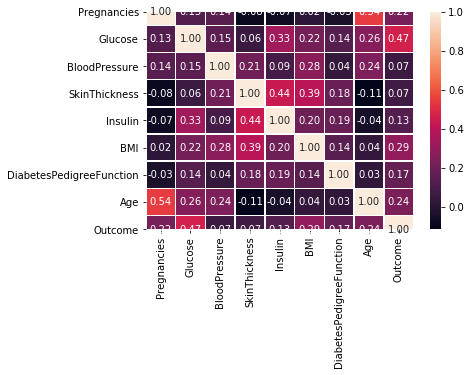

In [9]:
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f')

In [10]:
#correlation dataframe
df_cor = df.corr()
df_cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
def grouping_attribute_score(attrubutes, value):
    '''combine value to dictionary format for subset'''
    return {"attributes": attrubutes, "value": value}

In [12]:
def find_best_subset(subset_score, max_min='max'):
    """find best score of subset subset score is list of grouping_attribute_score
        max_min (str) : can be only 'max' or 'min' to define the best value
    """
    #still available for only a group of attributes
    print('========================================== find best value ===================================')
    best_subset_score = []
    
    if max_min == 'min':
        # min is the best
        current_best_score_index = (1,0) 
        for subset in subset_score:
            if subset['value'] < current_best_score_index[0]:
                current_best_score_index = (subset['value'],(subset_score.index(subset)))
    else:        
        #max is the best
        current_best_score_index = (0,0) 
        for subset in subset_score:
            if subset['value'] > current_best_score_index[0]:
                current_best_score_index = (subset['value'],(subset_score.index(subset)))

    best_subset_score.append(subset_score[current_best_score_index[1]])
    print(best_subset_score)
    print("=============================================================================================")
    return best_subset_score
# return [{'attrubute': ('Glucose', 'BMI'), 'value': 0.3796380304756596}]

In [13]:
def cal_best(algo_round):
    '''map all subset with subset score and find the best one'''
    #start calculating
    subset_score = []
    subset_mean = []
    
    #use mean of all correlation of subset
    for atrs in algo_round:
        temp_score_mean = []
        for i in atrs:
#             cor = np.corrcoef(X[i], y)[0, 1]
            cor = df_cor[label][i]
            temp_score_mean.append(cor)
        subset_mean.append(np.mean(temp_score_mean)) #score
        
    for atrs,mean_score in zip(algo_round,subset_mean):
        subset_score.append(grouping_attribute_score(atrs, mean_score))
    [print(i) for i in subset_score]
    return find_best_subset(subset_score=subset_score)

<h1>SBS

In [14]:
best_subset_per_round = []
for num in range(num_feats-1, 0, -1):
    print("========================================== Subset_Score Round", (num_feats)-num,'=============================')
    if num == num_feats-1: #1st round
        print(num)
        print()
        
        #combination of subset in each round
        sbs_round = list(itertools.combinations(features, num))

        best_subset_per_round.append(cal_best(algo_round=sbs_round))

        print()
        
    else: #other round
        print(num)
        print()
        #combination of subset in each round
        sbs_round = list(itertools.combinations(best_subset_per_round[num-(num_feats-2)][0]['attributes'], num))

        #prepare subset amount
        sbs_round_temp = [best_subset_per_round[num-(num_feats-2)][0]['attributes']]

        
        best_subset_per_round.append(cal_best(algo_round=sbs_round))
        print()       
        
print()
print('best_subset_per_round->',"\n", '=============== SubsetRanking ===============')
# [print(i) for i in best_subset_per_round]

best_temp = [i[0] for i in best_subset_per_round]
best_subset_per_round = best_temp
best_subset_per_round.sort(key=lambda x: x['value'], reverse=True)
best_subset_per_round

========================================== Subset_Score Round 1 =============================
7

{'attributes': ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'), 'value': 0.20362668942728174}
{'attributes': ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'), 'value': 0.21284267762360126}
{'attributes': ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'), 'value': 0.19586402091053184}
{'attributes': ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'), 'value': 0.2190278363048745}
{'attributes': ('Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'), 'value': 0.22699865387140714}
{'attributes': ('Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'), 'value': 0.22838206420969093}
{'attributes': ('Pregnancies', 

[{'attributes': ('Glucose',), 'value': 0.4665813983068757},
 {'attributes': ('Glucose', 'BMI'), 'value': 0.3796380304756612},
 {'attributes': ('Glucose', 'BMI', 'Age'), 'value': 0.3325440146595066},
 {'attributes': ('Pregnancies', 'Glucose', 'BMI', 'Age'),
  'value': 0.304882549253127},
 {'attributes': ('Pregnancies',
   'Glucose',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.2786748525330938},
 {'attributes': ('Pregnancies',
   'Glucose',
   'Insulin',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.25398703625825286},
 {'attributes': ('Pregnancies',
   'Glucose',
   'SkinThickness',
   'Insulin',
   'BMI',
   'DiabetesPedigreeFunction',
   'Age'),
  'value': 0.22838206420969093}]

<h2> The Best Candidate Subset by SBS

In [15]:
find_best_subset(best_subset_per_round)

========================================== find best value ===================================
[{'attributes': ('Glucose',), 'value': 0.4665813983068757}]


[{'attributes': ('Glucose',), 'value': 0.4665813983068757}]